# **<노드 실습>**

------------------

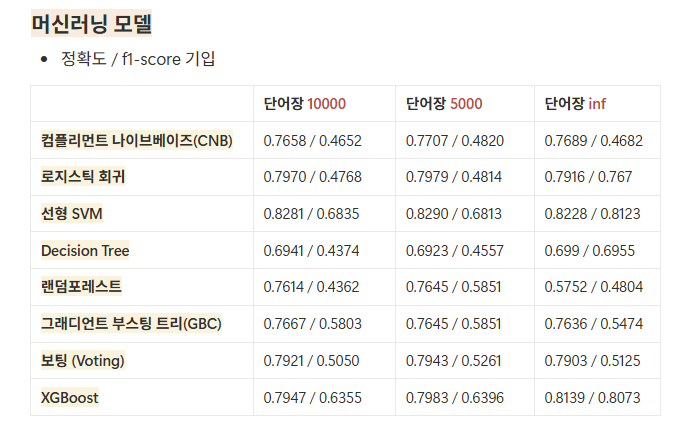

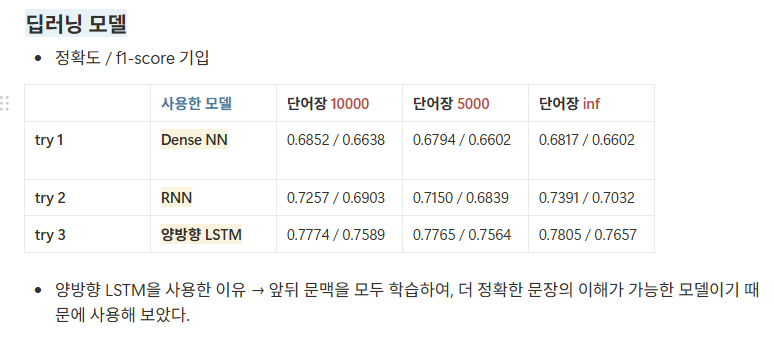

<프로젝트 요약>
- 맡은 부분
  - 단어장 5000개 -> 머신러닝 8가지 모델 + 딥러닝 3가지 모델
  - 단어장 10000개 -> 딥러닝 3가지 모델
  - 단어장 inf (단어장 크기 X) -> 딥러닝 3가지 모델
- 사용한 머신러닝 모델 8가지
  - 컴플리먼트 나이브베이즈(CNB), 로지스틱회귀, 선형 SVM, Decision Tree, 랜덤포레스트, 그래디언트 부스팅 트리, 보팅(soft voting), XGBoost
- 사용한 딥러닝 모델 3가지 -> Dense NN, RNN, 양방향 LSTM (Bidirectional LSTM)
  - 양방향 LSTM 모델 추가적으로 해본 이유 -> 양방향 LSTM 모델은 앞뒤 문맥을 모두 학습하여, 더 정확한 문장의 이해가 가능한 모델이라고 해서 사용해봤다..!
- 결과 정리
  - 단어장의 크기가 10000, 5000, inf(크기X)든 모델의 정확도 부분에서는 눈에 띄게 차이나지 않았다. 아마도, 머신러닝 모델의 경우, 하이퍼파라미터 튜닝도 심도있게 진행하지 않았고(시간관계상 & 노트북 성능이 그닥 좋지 않으므로 너어무 오래걸림), 거의 기본 옵션으로만 가지고 모델을 돌려서 3개의 실험군에 대한 차이를 관찰하지 못한 부분이 아쉽다. -> 이 부분은 추후에 다시 해볼 예정이다.
  - 머신러닝 모델보다, 딥러닝 모델의 성능이 조금 더 떨어지는 것을 관찰했다. -> 아마도 하이퍼파라미터를 조정하지 않았기 때문에(?) 그런 것 같다.
  - 이는 딥러닝이 항상 좋은 건 아니며, 문제 유형이나 데이터의 특성, 자원 조건 등에 따라 어쩌면 머신러닝이 더 나은 선택이라고 판단할 수 있다.
  - 그리고 퍼실님이 제공해주신 코드에다가 성능을 높이려고 이것저것 시도했지만, 드라마틱한 성능 향상은 없었다! (코드는 다 지웠음).. 오히려 머신러닝보다 성능 향상이 더디는 느낌(?)..
  - 그리고, epoch수는 많으면 좋다고 느꼈다. 대신, 너무 오래걸려서 epoch는 다 10으로 진행했다.
- 느낀점: 분업화를 제안하려 했는데, 깜빡하고 모델 돌리기에 급급해서 뒤늦게 4시부터 분업을 했다. 그래도 다들 잘 해주셔서 빠르게 결과 정리를 할 수 있었다..!  


----------------------------------

## **노드 19 - 뉴스 카테고리 다중분류**

## 1) 라이브러리/데이터 불러오기/전처리

In [10]:
# !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## **단어장 크기: 10000**

In [2]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2) ##

In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [4]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [5]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [6]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [7]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [8]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial eligibility standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed evaluating <unk> credit using a variety of financial ratios instead of relying solely on <unk> ability senate agriculture committee chairman patrick leahy d vt <unk> the proposed eligibility changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last re

In [9]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 256, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [10]:
# W2V이 잘되었는지 확인 -> 여차저차 되긴한것같다
model_result = model.wv.most_similar('man')
print(model_result)

[('tinto', 0.8259144425392151), ('rio', 0.8140027523040771), ('read', 0.812625527381897), ('okla', 0.8038791418075562), ('olivetti', 0.8031720519065857), ('stockbrokers', 0.8025410175323486), ('alcan', 0.8018463253974915), ('sat', 0.8014054298400879), ('sydney', 0.7998384833335876), ('ontario', 0.7990812063217163)]


In [11]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])

In [12]:
print(x_train_w2v.shape)
print(x_test_w2v.shape)

(8982, 100, 256)
(2246, 100, 256)


## 2) 머신러닝 모델 학습
- 이 부분은 다른 그루분이 해주셨다..!

## 3) 딥러닝 모델 학습
- Dense NN, RNN, 양방향 LSTM (Bidirectional LSTM) 모델을 사용하였다.

### try1 -> Dense NN 모델

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


dense_model = Sequential([
    Flatten(input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요!
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,179,310 (50.28 MB)

 Trainable params: 13,179,310 (50.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5283 - loss: 2.1700 - val_accuracy: 0.6706 - val_loss: 1.4667
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6951 - loss: 1.2925 - val_accuracy: 0.6856 - val_loss: 1.3844
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7360 - loss: 1.0856 - val_accuracy: 0.6945 - val_loss: 1.3895
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7873 - loss: 0.8290 - val_accuracy: 0.6956 - val_loss: 1.3910
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8199 - loss: 0.7181 - val_accuracy: 0.6950 - val_loss: 1.4421
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8514 - loss: 0.6284 - val_accuracy: 0.6878 - val_loss: 1.5196
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8605 - loss: 0.6311 - val_accuracy: 0.6978 - val_loss: 1.5833
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8713 - loss: 0.5249 - val_accuracy: 

### try2 -> RNN 모델

In [27]:
# rnn 시계열 특징 데이터 특화 모델
rnn_model = Sequential([
    LSTM(128, input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요~
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

# 시간이 좀 걸립니다! 한 20분정도
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,366 (813.93 KB)

 Trainable params: 208,366 (813.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4009 - loss: 2.6109 - val_accuracy: 0.5609 - val_loss: 1.7542
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5533 - loss: 1.7823 - val_accuracy: 0.6322 - val_loss: 1.5315
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6123 - loss: 1.5897 - val_accuracy: 0.6528 - val_loss: 1.4236
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6461 - loss: 1.4537 - val_accuracy: 0.6784 - val_loss: 1.3167
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6661 - loss: 1.3632 - val_accuracy: 0.7078 - val_loss: 1.2510
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6844 - loss: 1.2883 - val_accuracy: 0.7218 - val_loss: 1.1978
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7225 - loss: 1.1659 - val_accuracy: 0.7206 - val_loss: 1.1691
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7153 - loss: 1.1624 - val_accuracy: 

### try3 -> 양방향 LSTM 모델

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# 양방향 LSTM 모델 구성
rnn_model = Sequential([
    Bidirectional(LSTM(128), input_shape=(100, 256)),  # 양방향 적용
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')  # 클래스 수 = 46
])

# 컴파일
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

# 학습 (시간 다소 소요)
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

# 평가
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,678 (1.58 MB)

 Trainable params: 413,678 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5241 - loss: 2.0962 - val_accuracy: 0.6917 - val_loss: 1.3058
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6895 - loss: 1.3134 - val_accuracy: 0.7340 - val_loss: 1.1228
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7258 - loss: 1.1612 - val_accuracy: 0.7507 - val_loss: 1.0529
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7448 - loss: 1.0766 - val_accuracy: 0.7607 - val_loss: 0.9838
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7643 - loss: 0.9415 - val_accuracy: 0.7607 - val_loss: 0.9918
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7851 - loss: 0.8574 - val_accuracy: 0.7752 - val_loss: 0.9528
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7980 - loss: 0.8146 - val_accuracy: 0.7813 - val_loss: 0.9381
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8183 - loss: 0.7273 - val_accu